<a href="https://colab.research.google.com/github/harkpun/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

## <b> What is Cardiovascular disease? <b>

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots. It can also be associated with damage to arteries in organs such as the brain, heart, kidneys and eyes.

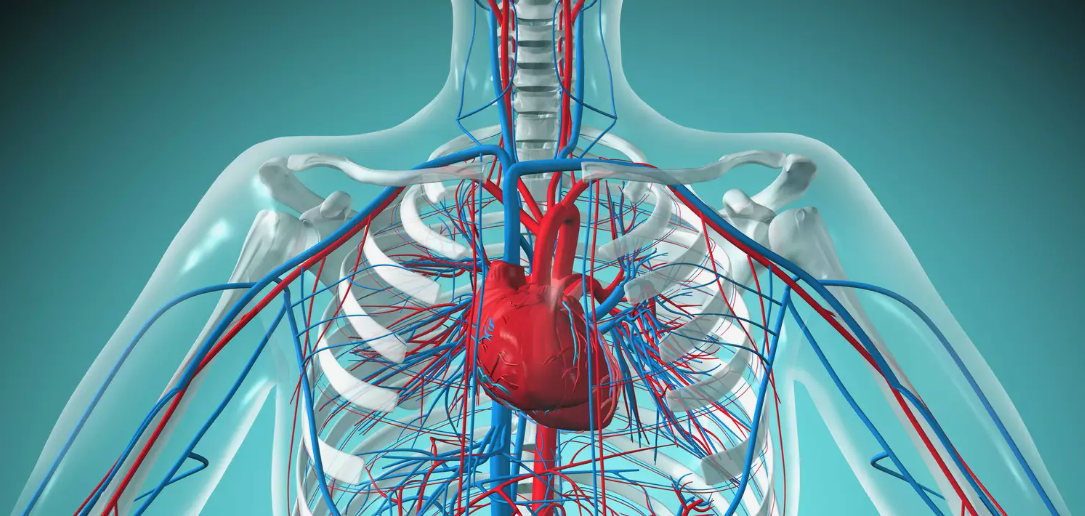


## **Data Description**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**

##### **Each attribute is a potential risk factor. These attributes are demographic, behavioral and medical risk factors.**

**Attribute Informations-**

Demographic
* ***Sex***: male or female("M" or "F")
* ***Age***: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
* ***is_smoking***: whether or not the patient is a current smoker ("YES" or "NO")
* ***Cigs Per Day***: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
* ***BP Meds***: whether or not the patient was on blood pressure medication (Nominal)
* ***Prevalent Stroke***: whether or not the patient had previously had a stroke (Nominal)
* ***Prevalent Hyp***: whether or not the patient was hypertensive (Nominal)
* ***Diabetes***: whether or not the patient had diabetes (Nominal)

Medical(current)
* ***Tot Chol***: total cholesterol level (Continuous)
* ***Sys BP***: systolic blood pressure (Continuous)
* ***Dia BP***: diastolic blood pressure (Continuous)
* ***BMI***: Body Mass Index (Continuous)
* ***Heart Rate***: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* ***Glucose***: glucose level (Continuous)

Predict variable (desired target)
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Classification/data_cardiovascular_risk.csv', index_col='id')

In [41]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [42]:
df.shape

(3390, 16)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [44]:
df.duplicated().sum()

0

In [45]:
print(f'null values \n{df.isna().sum().sort_values(ascending=False)}')
print('-'*50)
print(f'% of null values \n{round(df.isna().sum()/len(df)*100,2).sort_values(ascending=False)}')

null values 
glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64
--------------------------------------------------
% of null values 
glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
age                0.00
sex                0.00
is_smoking         0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
dtype: float64


In [46]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [47]:
for col in df.columns:
  print(f'number of unique column in {col} is {df[col].nunique()}')
  print(f'{col} is {df[col].unique()}')
  print('-'*50)

number of unique column in age is 39
age is [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
--------------------------------------------------
number of unique column in education is 4
education is [ 2.  4.  1.  3. nan]
--------------------------------------------------
number of unique column in sex is 2
sex is ['F' 'M']
--------------------------------------------------
number of unique column in is_smoking is 2
is_smoking is ['YES' 'NO']
--------------------------------------------------
number of unique column in cigsPerDay is 32
cigsPerDay is [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
--------------------------------------------------
number of unique column in BPMeds is 2
BPMeds is [ 0. nan  1.]
--------------------------------------------------
number of unique column in prevalentStroke is 2
prevalentStroke is [0 1]
-

In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


In [49]:
numeric_features = []
category_features = []

for col in df.columns:
  # print('='*100)
  # print(f'{col} : {df[col].unique()}')

  if df[col].nunique() > 5:
    numeric_features.append(col)
  else:
    category_features.append(col)

print(numeric_features)
print(category_features)

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


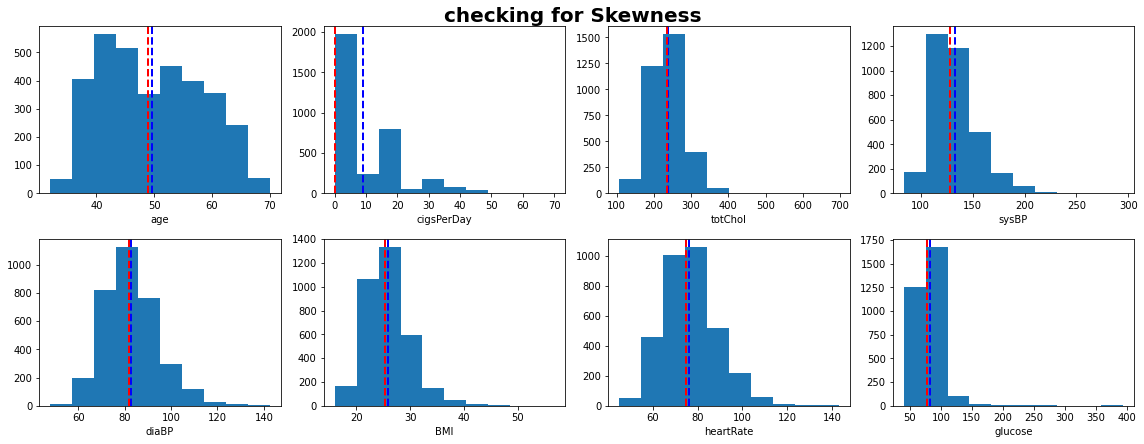

In [50]:
plt.figure(figsize=(16,6))
plt.suptitle('checking for Skewness', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2,4, i+1)
  plt.hist(df[col])
  plt.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.xlabel(col) 
  plt.tight_layout()

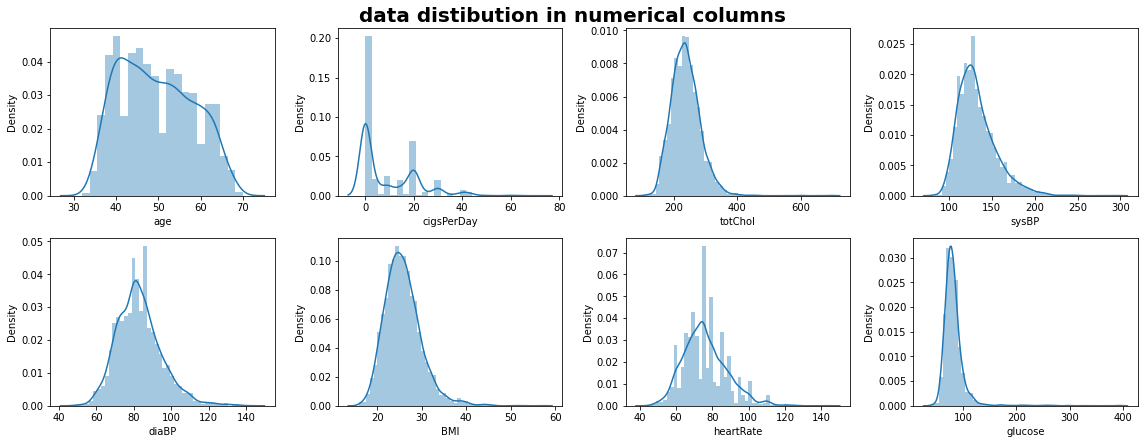

In [51]:
plt.figure(figsize=(16,6))
plt.suptitle('data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.distplot(df[col])  
  plt.xlabel(col)
  plt.tight_layout()

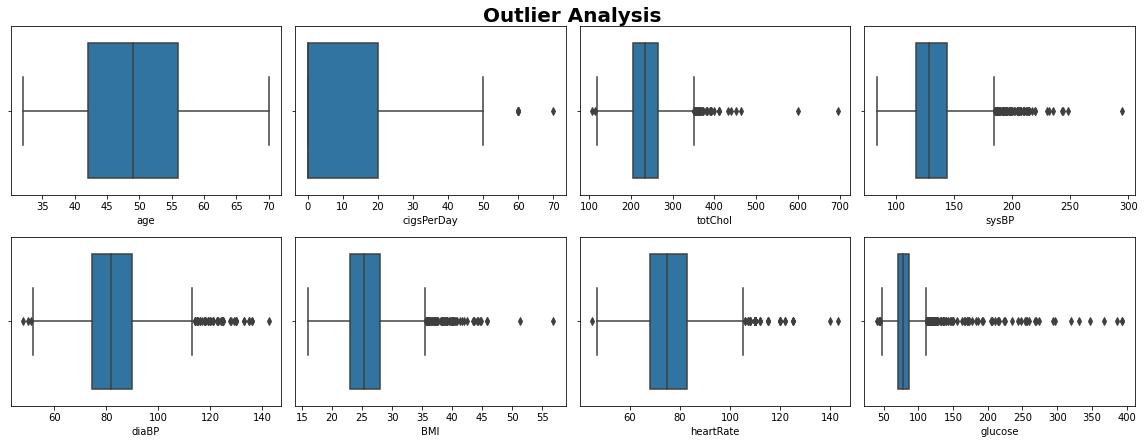

In [52]:
plt.figure(figsize=(16,6))
plt.suptitle('Outlier Analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.tight_layout()

In [53]:
df1 = df.copy()

for col in numeric_features:
  
  #usning IQR method to defined range of upper and lower limit.
  IQR = df1[col].quantile(0.75) - df1[col].quantile(0.25)
  upper_limit = df1[col].quantile(0.75) + (1.5 * IQR)
  lower_limit = df1[col].quantile(0.25) - (1.5 * IQR)
  print(f'{col} ---> upper:{upper_limit}   lower:{lower_limit}')

  # replcing with upper_limit, if outlier is higher than upper_limit.
  df1[col] = np.where(df1[col]>upper_limit, upper_limit, df1[col])
  
  # replcing with lower_limit, if outlier is lesser than lower_limit.
  df1[col] = np.where(df1[col]<lower_limit, lower_limit, df1[col])

age ---> upper:77.0   lower:21.0
cigsPerDay ---> upper:50.0   lower:-30.0
totChol ---> upper:351.0   lower:119.0
sysBP ---> upper:184.5   lower:76.5
diaBP ---> upper:113.25   lower:51.25
BMI ---> upper:35.57   lower:15.49
heartRate ---> upper:105.5   lower:45.5
glucose ---> upper:111.0   lower:47.0


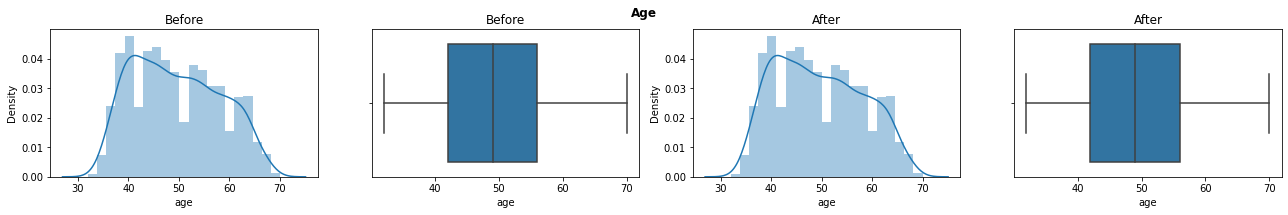

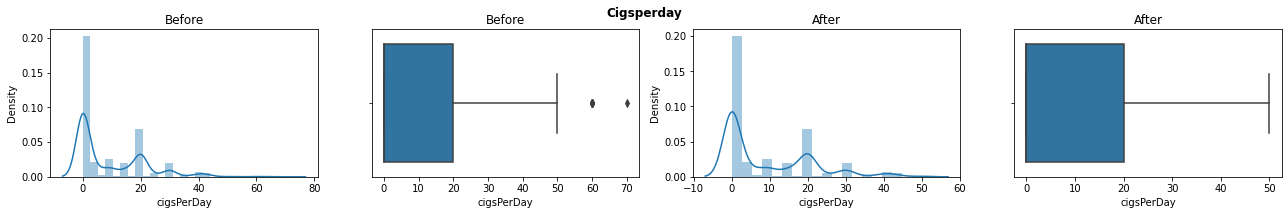

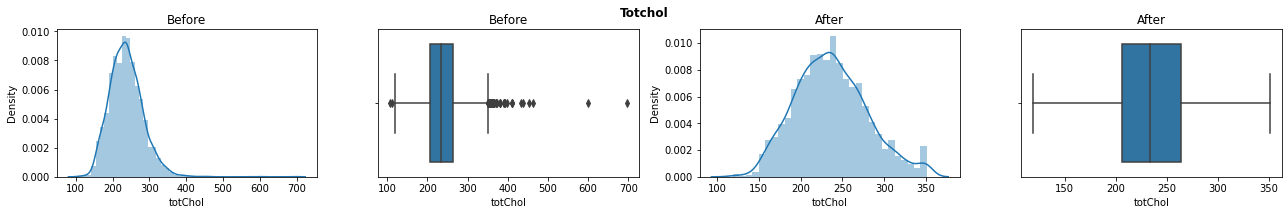

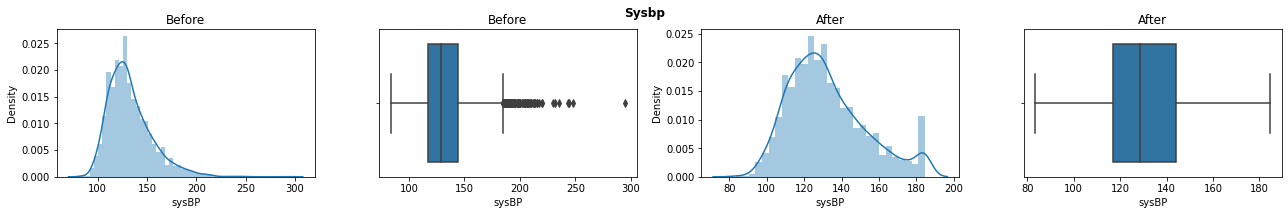

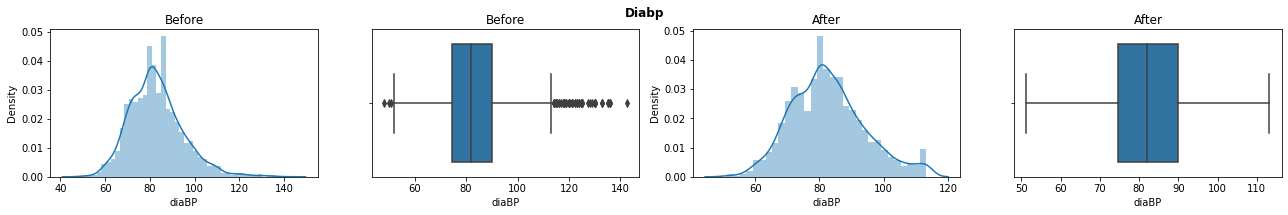

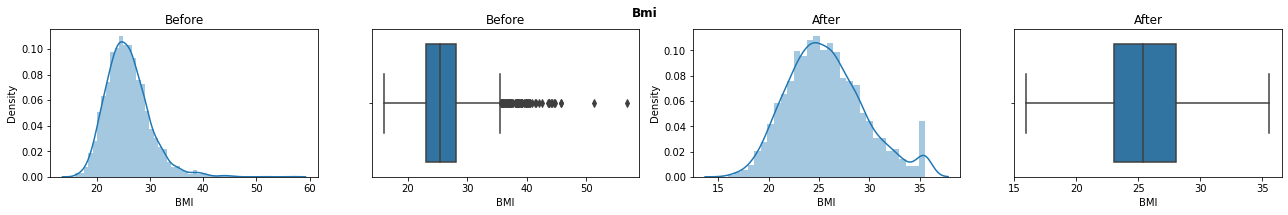

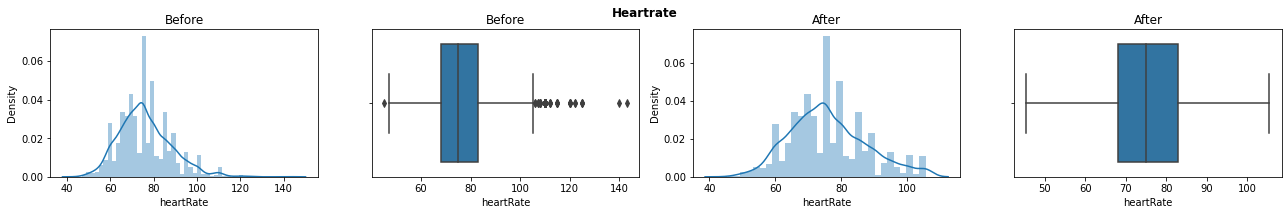

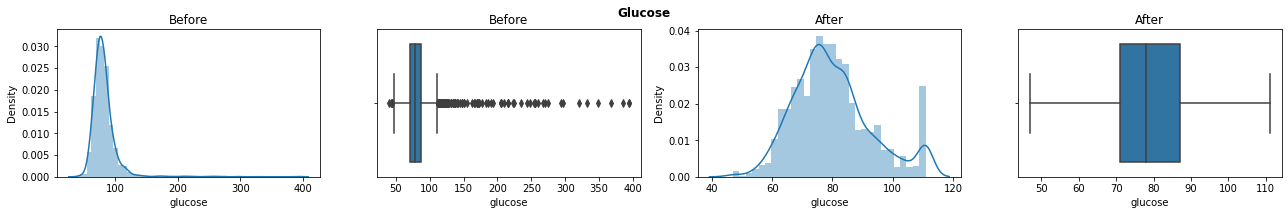

In [54]:
for col in numeric_features:
  fig, ax =plt.subplots(1,4, figsize=(18,3))
  
  # Before treating outliers 
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  
  # After treating outliers
  sns.distplot(df1[col], ax=ax[2]).set(title="After")
  sns.boxplot(df1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

In [55]:
print(f'null values \n{df.isna().sum().sort_values(ascending=False)}')
print('-'*50)
print(f'% of null values \n{round(df.isna().sum()/len(df)*100,2).sort_values(ascending=False)}')

null values 
glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64
--------------------------------------------------
% of null values 
glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
age                0.00
sex                0.00
is_smoking         0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
dtype: float64


**Imputing NaN values present in dataset with mean after treating outlier.**

In [56]:
# imputing missing  values
nan_col = ['glucose','totChol','BMI','heartRate','education','cigsPerDay','BPMeds']

for col in nan_col:
  df1[col] = df[col].fillna(df[col].mean())

In [57]:
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

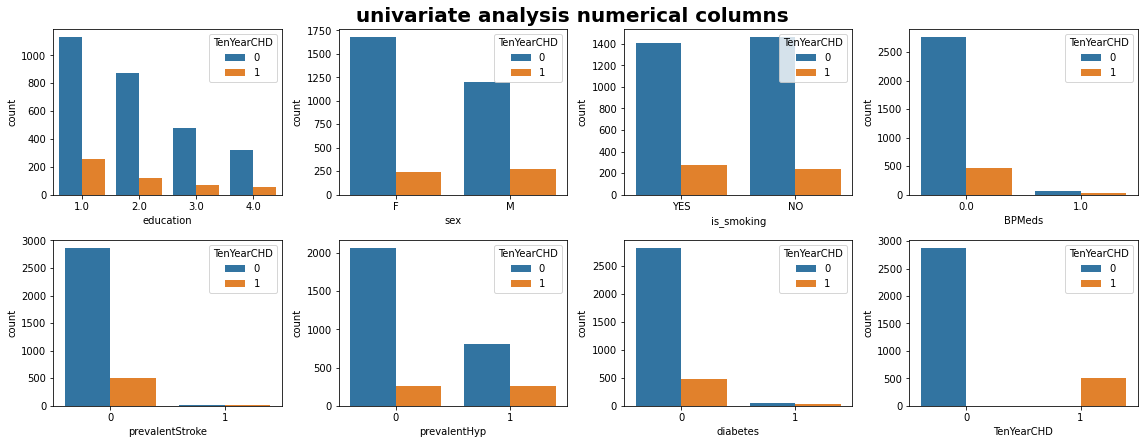

In [58]:
plt.figure(figsize=(16,6))
plt.suptitle('univariate analysis numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features):
  plt.subplot(2, 4, i+1)
  sns.countplot(df[col], hue='TenYearCHD', data=df)
  plt.xlabel(col)
  plt.tight_layout()

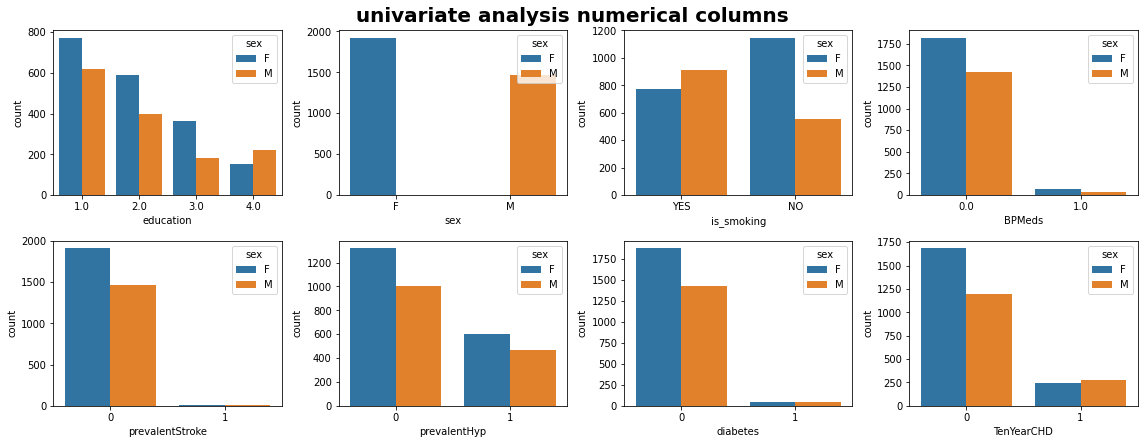

In [59]:
plt.figure(figsize=(16,6))
plt.suptitle('univariate analysis numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features):
  plt.subplot(2, 4, i+1)
  sns.countplot(df[col], hue='sex', data=df)
  plt.xlabel(col)
  plt.tight_layout()

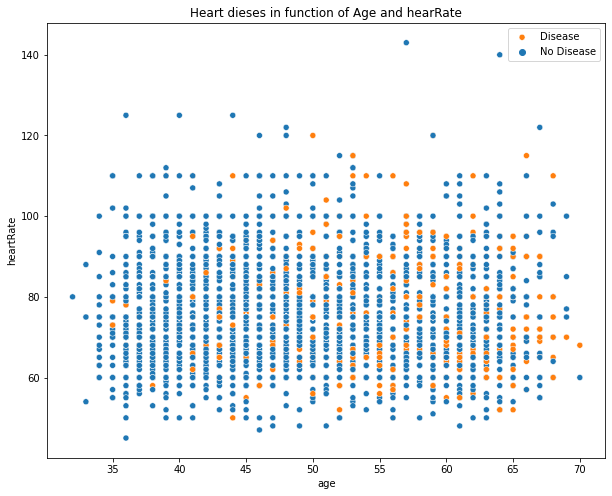

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=df)
plt.title('Heart dieses in function of Age and hearRate')
plt.legend(['Disease', 'No Disease'])

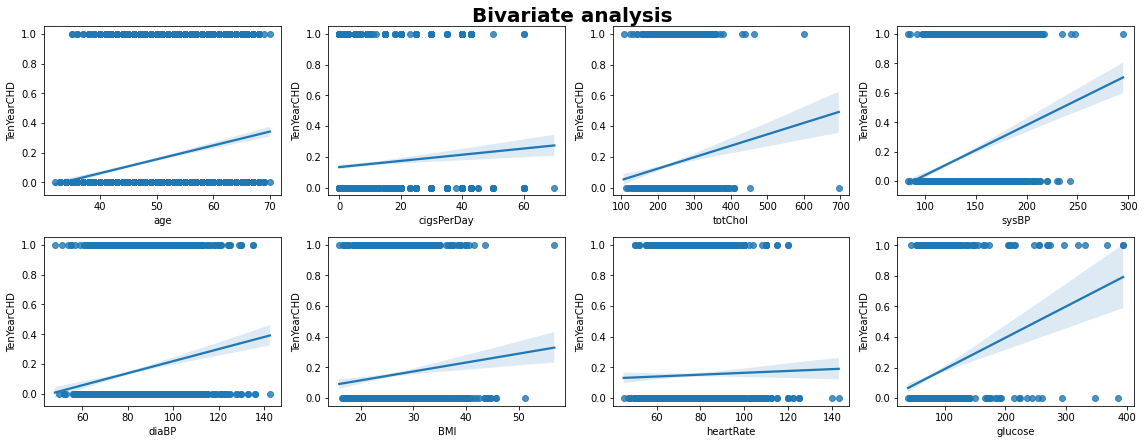

In [61]:
plt.figure(figsize=(16,6))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.regplot(x=df[col], y='TenYearCHD', data=df)
  plt.xlabel(col)
  plt.tight_layout()

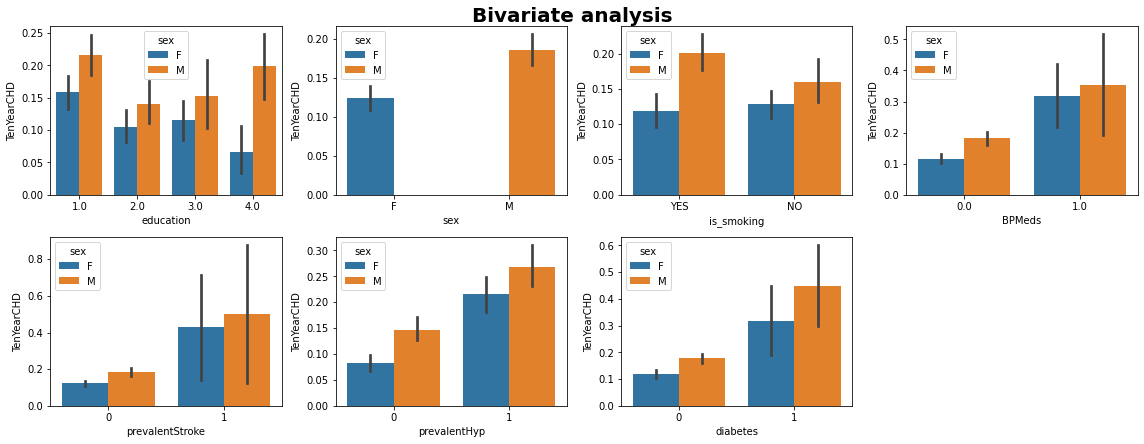

In [62]:
plt.figure(figsize=(16,6))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features[:-1]):
  plt.subplot(2, 4, i+1)
  sns.barplot(x=df[col], y='TenYearCHD', hue='sex', data=df)
  plt.xlabel(col)
  plt.tight_layout()

### **Correlation Heatmap**

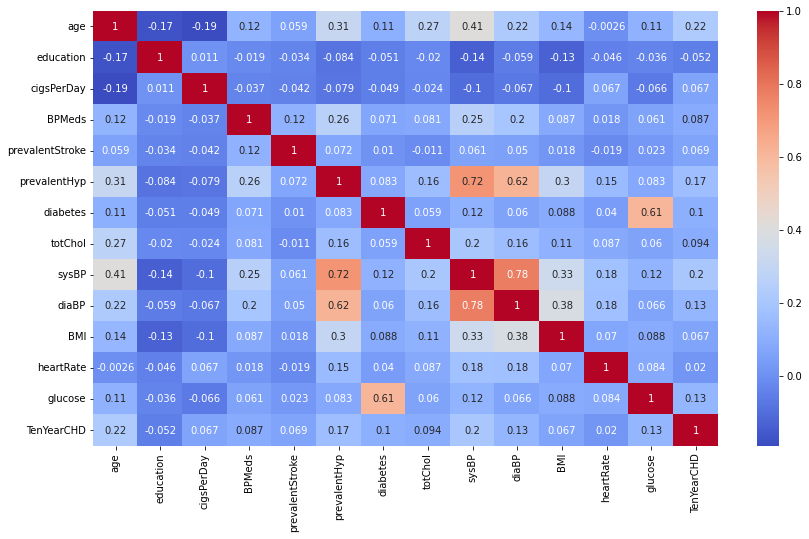

In [68]:
plt.figure(figsize=(14,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

### **VIF analysis**

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns
  
  return vif

In [83]:
calc_vif(df1[[i for i in numeric_features if i not in ['glucose','totChol','heartRate','diaBP','sysBP','BMI']]])

,VIF Factor,features
0,1.489233,age
1,1.489233,cigsPerDay


In [92]:
final_numeric_features = ['age','cigsPerDay']

## **Encoding**

In [86]:
df1['sex'] = df1['sex'].map({'M':1, 'F':0})
df1['is_smoking'] = df1['is_smoking'].map({'YES':1, 'NO':0})

In [87]:
category_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [96]:
final_df = final_numeric_features + category_features
print(final_df)
print(len(final_df))

['age', 'cigsPerDay', 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
10


In [97]:
df1[final_df]

,age,cigsPerDay,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
id,,,,,,,,,,
0,64.0,3.0,2.0,0,1,0.000000,0,0,0,1
1,36.0,0.0,4.0,1,0,0.000000,0,1,0,0
2,46.0,10.0,1.0,0,1,0.000000,0,0,0,0
3,50.0,20.0,1.0,1,1,0.000000,0,1,0,1
4,64.0,30.0,1.0,0,1,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3385,60.0,0.0,1.0,0,0,0.000000,0,0,0,0
3386,46.0,0.0,1.0,0,0,0.000000,0,0,0,0
3387,44.0,3.0,3.0,1,1,0.000000,0,1,0,1


In [102]:
df1[final_df].drop(columns='TenYearCHD')

,age,cigsPerDay,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes
id,,,,,,,,,
0,64.0,3.0,2.0,0,1,0.000000,0,0,0
1,36.0,0.0,4.0,1,0,0.000000,0,1,0
2,46.0,10.0,1.0,0,1,0.000000,0,0,0
3,50.0,20.0,1.0,1,1,0.000000,0,1,0
4,64.0,30.0,1.0,0,1,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...
3385,60.0,0.0,1.0,0,0,0.000000,0,0,0
3386,46.0,0.0,1.0,0,0,0.000000,0,0,0
3387,44.0,3.0,3.0,1,1,0.000000,0,1,0


In [233]:
# independent and dependent features

X = df1[final_df].drop(columns='TenYearCHD')
y = df1['TenYearCHD']

In [234]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings('ignore')

In [235]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model

### **Train Test Split**

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(2712, 9)
(678, 9)


### **Scaling Data**

In [462]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Handling Imbalance Data**
Oversampling the train dataset using **SMOTETomek technique**

In [483]:
## Handling imbalance data using SMOTE techniques
from imblearn.combine import SMOTETomek
from collections import Counter

#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

# Checking Value counts for both classes Before and After handling Class Imbalance:
print(f'before handling class imbalance \n{y_train.value_counts()}')
print('\n')
print(f'after handling class imbalance \n{y_train_smote.value_counts()}')

before handling class imbalance 
0    2304
1     408
Name: TenYearCHD, dtype: int64


after handling class imbalance 
0    2229
1    2229
Name: TenYearCHD, dtype: int64


In [486]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_smote,y_train_smote)

In [487]:
print(f'train data score : {lr.score(X_train_smote, y_train_smote)}')
print(f'test data score : {lr.score(X_test, y_test)}')

train data score : 0.6680125616868551
test data score : 0.6563421828908554


In [488]:
X.columns

Index(['age', 'cigsPerDay', 'education', 'sex', 'is_smoking', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes'],
      dtype='object')

In [489]:
lr.coef_ 

array([[ 0.61024292,  0.29240889, -0.114591  ,  0.11046254,  0.17035955,
         0.11037166,  0.08738969,  0.2898617 ,  0.17330383]])

In [490]:
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report

In [491]:
# Get the predicted classes
train_class_preds = lr.predict(X_train_smote)
test_class_preds = lr.predict(X_test)

In [492]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train_smote)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6680125616868551
The accuracy on test data is  0.6563421828908554


In [507]:
test_class_preds = lr.predict(X_test)
print(confusion_matrix(y_test, test_class_preds))
print(accuracy_score(y_test, test_class_preds))
print(classification_report(y_test, test_class_preds))

roc_curve(y_test, test_class_preds)

[[370 205]
 [ 28  75]]
0.6563421828908554
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       575
           1       0.27      0.73      0.39       103

    accuracy                           0.66       678
   macro avg       0.60      0.69      0.58       678
weighted avg       0.83      0.66      0.70       678



(array([0.        , 0.35652174, 1.        ]),
 array([0.        , 0.72815534, 1.        ]),
 array([2, 1, 0]))

In [500]:
def predict(ml_model, X,y):
  
  #train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
  
  #standrdization
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # handling imbalance data
  #X_train, y_train = smt.fit_resample(X_train, y_train)
  X_train_smote, y_train_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

  # model fitting
  model = ml_model.fit(X_train_smote, y_train_smote)
  y_pred_train = model.predict(X_train_smote)
  y_pred_test = model.predict(X_test)

  # performance metrics on train data.
  print(confusion_matrix(y_train_smote, y_pred_train))
  print(accuracy_score(y_train_smote, y_pred_train))
  print(classification_report(y_train_smote, y_pred_train))
  print('='*75)

  # performance metrics on test data.
  print(confusion_matrix(y_test, y_pred_test))
  print(accuracy_score(y_test, y_pred_test))
  print(classification_report(y_test, y_pred_test))
  print('='*75)

  # actual vs predicted value on test data
  d = {'y_actual':y_test, 'y_predict':y_pred_test, 'error_difference':y_test-y_pred_test}
  return pd.DataFrame(data=d).head().T

In [504]:
from sklearn.ensemble import RandomForestClassifier
predict(RandomForestClassifier(n_estimators=100, min_samples_leaf=7, min_samples_split=5, random_state=33),X,y)

[[1862  367]
 [ 355 1874]]
0.8380439659039928
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2229
           1       0.84      0.84      0.84      2229

    accuracy                           0.84      4458
   macro avg       0.84      0.84      0.84      4458
weighted avg       0.84      0.84      0.84      4458

[[446 129]
 [ 55  48]]
0.7286135693215339
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       575
           1       0.27      0.47      0.34       103

    accuracy                           0.73       678
   macro avg       0.58      0.62      0.59       678
weighted avg       0.80      0.73      0.76       678



id,995,376,1739,1472,477
y_actual,0,0,0,0,0
y_predict,1,0,0,0,0
error_difference,-1,0,0,0,0
